# Principal component analysis for multi-spectral data<img align="right" src="../Supplementary_data/DE_Africa_Logo_Stacked_RGB_small.jpg">

* **Products used:** 
[s2_l2a](https://explorer.digitalearth.africa/s2_l2a)


## Background

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction.
It can be used to explore patterns in high-dimensional data and assist unsupervised learning.

Principal components are a series of linear combinations of the original variables, among which the first principal component accounts for the greatest variance within a dataset.
Each subsequent principal component accounts for the next greatest possible variance and is uncorrelated with the previously defined components.

This technique is useful for understanding Sentinel-2 data as images are captured in 12 spectral bands but only 3 variables can be visualized in a RGB composite.
PCA can also be applied to timeseries data to investigate temporal evolution patterns for different land cover types.

## Description

This notebook demonstrates a principal component analysis for Sentinel-2 multi-spectal data. 
Following steps are covered:

1. Loading Sentinel-2 multi-spectral data.
2. Applying PCA to transform and visualize data.
***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline

from sklearn.decomposition import PCA
import datacube

import sys
sys.path.append('../Scripts')
from deafrica_datahandling import load_ard
from deafrica_plotting import rgb
from deafrica_classificationtools import sklearn_flatten, sklearn_unflatten

/env/lib/python3.6/site-packages/datacube/storage/masking.py:4: DeprecationWarning: datacube.storage.masking has moved to datacube.utils.masking
  category=DeprecationWarning)


### Connect to the datacube

Connect to the datacube so we can access DEAfrica data.

In [2]:
dc = datacube.Datacube(app='pca')

### Analysis parameters

This section defines the analysis parameters, including 

* center lat/lon and analysis window size for the area of interest
* time period to be investigated
* projection and resolution for loading data
* acceptable range of cloud cover percentage for input Sentinel-2 granule
* spectral bands to be explored

The default location is Betsiboka Estuary, Madagascar.

To limit overall memory usage, if a larger analysis window or higher resolution is desired, the time period should be reduced accordingly.

In [3]:
# Create a query object
lat, lon = -15.92, 46.35
buffer = 0.2

query = {
    'time': ('2020-01', '2020-03'),
    'x': (lon - buffer, lon + buffer),
    'y': (lat + buffer, lat - buffer),
    'output_crs': 'epsg:6933',
    'resolution':(-20,20),
    'cloud_cover':(0,5),
}

# use all non-overlapping 10m and 20m bands
bands = ['blue', 'green', 'red', 'red_edge_1', 'red_edge_2',
         'red_edge_3', 'nir_narrow', 'swir_1', 'swir_2']

## Loading Sentinel-2 multi-spectral data

Only high probablity cloud is excluded in this example, but this can be modified for a different area.


In [4]:
ds = load_ard(dc=dc,
              products=['s2_l2a'],
              measurements=bands,
              pq_categories_s2=['vegetation', 'snow or ice', 'water', 'bare soils',
                                'unclassified', 'dark area pixels', 'cloud_shadows',
                                'cloud medium probability', 'thin cirrus'],
              group_by='solar_day',
              **query)


Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Applying pixel quality/cloud mask
Loading 4 time steps


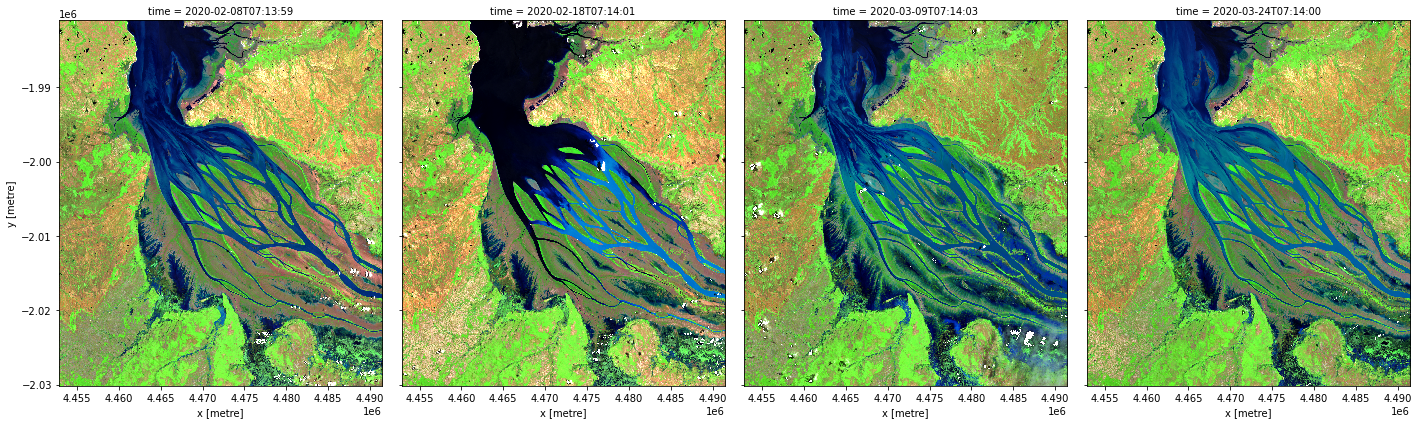

In [5]:
# visualize data using selected input spectral bands
rgb(ds, bands=['swir_1','nir_narrow','red_edge_1'], index=list(range(len(ds.time))), col_wrap=4)

## Applying PCA to transform and visualize data

To perform a PCA, data is first transformed into a numpy array that can be used by sklearn.

In [6]:
X = sklearn_flatten(ds)

A PCA model is generated with 3 principal components and fitted on the data.

In [7]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

We can investigate how much variance is accounted for in each principal component.
In the default example, the first principal component accounts for a much high variance than the next two.

This step can help determine whether more principal components are needed.

In [8]:
print("Relative variance in principal components:", pca.explained_variance_ratio_)

Relative variance in principal components: [0.70092354 0.2061601  0.12267804]


The input data can now be transformed into this new reference space and rearranged into a xarray dataset compatible with input data.

In [9]:
predict = pca.transform(X)

In [10]:
out = sklearn_unflatten(predict, ds)
out = out.to_dataset(dim=out.dims[0]).transpose('time','y','x')

### Visualise PCA results

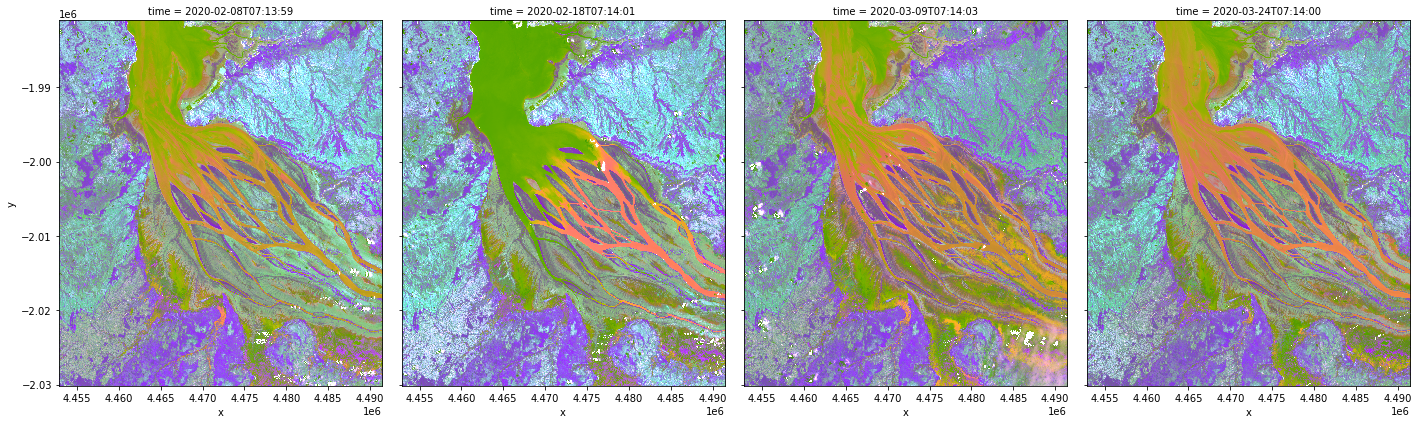

In [11]:
# Use code comments for low-level documentation of code
rgb(out, bands=[2,1,0], index=list(range(len(out.time))), col_wrap=4)

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Last modified:** June 2020

**Compatible datacube version:** 

In [12]:
print(datacube.__version__)

1.8.0


## Tags
Browse all available tags on the DE Africa User Guide's [Tags Index](https://) (placeholder as this does not exist yet)